# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 觀察填補缺值以及 標準化 / 最小最大化 對數值的影響

# [作業重點]
- 觀察替換不同補缺方式, 對於特徵的影響 (In[4]~In[6], Out[4]~Out[6])
- 觀察替換不同特徵縮放方式, 對於特徵的影響 (In[7]~In[8], Out[7]~Out[8])

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import numpy as np
import pandas as pd
import copy
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
data_path='./data/'
df_train=pd.read_csv(data_path + 'titanic_train.csv')
df_test=pd.read_csv(data_path + 'titanic_test.csv')

train_Y=df_train['Survived']
ids=df_test['PassengerId']
df_train=df_train.drop(['PassengerId','Survived'],axis=1)
df_test=df_test.drop(['PassengerId'],axis=1)
df=pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features=[]
for dtype,feature in zip(df.dtypes,df.columns):
    if dtype=='int64' or dtype=='float64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



In [3]:
df=df[num_features]
train_num=train_Y.shape[0]
df.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


# 作業1
* 試著在補空值區塊, 替換並執行兩種以上填補的缺值, 看看何者比較好?

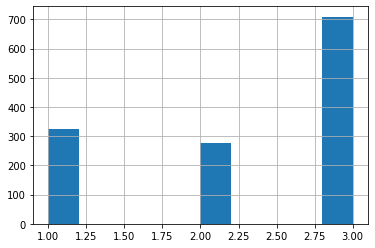

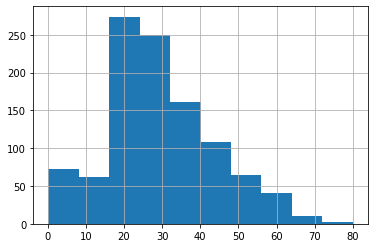

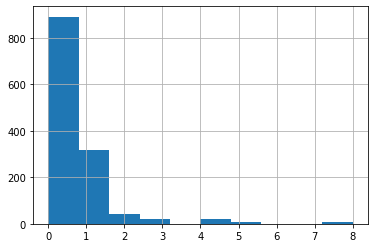

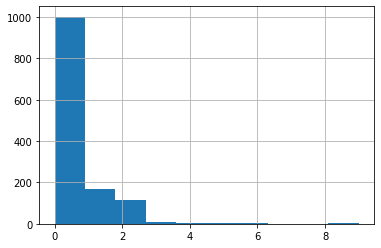

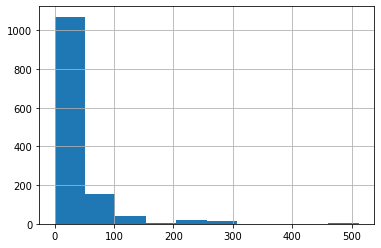

In [12]:
import matplotlib.pyplot as plt
for col in df.columns:
    df[col].hist()
    plt.show()

In [5]:
import warnings
warnings.filterwarnings('ignore')
# 空值補 -1, 做羅吉斯迴歸
df_m1=df.fillna(-1)
train_X=df_m1[:train_num]
estimator=LogisticRegression()
print('空值補 -1, 做羅吉斯迴歸:')
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())

空值補 -1, 做羅吉斯迴歸:
0.6960299128976762


In [6]:
# 空值補 mode, 做羅吉斯迴歸
df_mode=copy.deepcopy(df)
for feature in num_features:
    mode=list(df_mode[feature].value_counts().index)
    df_mode.loc[df_mode[feature].isnull(),feature]=mode[0]

train_X=df_mode[:train_num]
estimator=LogisticRegression()
print('空值補 mode, 做羅吉斯迴歸:')
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())

空值補 mode, 做羅吉斯迴歸:
0.6936879984197388


In [7]:
# 空值補 mean, 做羅吉斯迴歸
df_m2=df.fillna(np.mean(df))
train_X=df_m2[:train_num]
estimator=LogisticRegression()
print('空值補 mean, 做羅吉斯迴歸:')
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())

空值補 mean, 做羅吉斯迴歸:
0.6981761033723469


# 作業2
* 使用不同的標準化方式 ( 原值 / 最小最大化 / 標準化 )，搭配羅吉斯迴歸模型，何者效果最好?

In [8]:
# 空值補 -1 搭配 最小最大化
df_temp=MinMaxScaler().fit_transform(df_m1)
train_X=df_temp[:train_num]
estimator=LogisticRegression()
score_median_MinMax=cross_val_score(estimator,train_X,train_Y,cv=5).mean()

# 空值補 -1 搭配 stardard
df_temp2=StandardScaler().fit_transform(df_m1)
train_X=df_temp2[:train_num]
estimator=LogisticRegression()
score_median_Stand=cross_val_score(estimator,train_X,train_Y,cv=5).mean()
print(f'空值補 -1 & MinMax : score={score_median_MinMax:.5f}')
print(f'空值補 -1 & Standard : score={score_median_Stand:.5f}')

空值補 -1 & MinMax : score=0.69713
空值補 -1 & Standard : score=0.69826


In [9]:
# 空值補 mean 搭配 最小最大化
df_temp=MinMaxScaler().fit_transform(df_m2)
train_X=df_temp[:train_num]
estimator=LogisticRegression()
score_median_MinMax=cross_val_score(estimator,train_X,train_Y,cv=5).mean()

# 空值補 mean 搭配 stardard
df_temp2=StandardScaler().fit_transform(df_m2)
train_X=df_temp2[:train_num]
estimator=LogisticRegression()
score_median_Stand=cross_val_score(estimator,train_X,train_Y,cv=5).mean()
print(f'空值補 mean & MinMax : score={score_median_MinMax:.5f}')
print(f'空值補 mean & Standard : score={score_median_Stand:.5f}')

空值補 mean & MinMax : score=0.69935
空值補 mean & Standard : score=0.69594


In [10]:
# 空值補 mode 搭配 最小最大化
df_temp=MinMaxScaler().fit_transform(df_mode)
train_X=df_temp[:train_num]
estimator=LogisticRegression()
score_median_MinMax=cross_val_score(estimator,train_X,train_Y,cv=5).mean()

# 空值補 mode 搭配 stardard
df_temp2=StandardScaler().fit_transform(df_mode)
train_X=df_temp2[:train_num]
estimator=LogisticRegression()
score_median_Stand=cross_val_score(estimator,train_X,train_Y,cv=5).mean()
print(f'空值補 mode & MinMax : score={score_median_MinMax:.5f}')
print(f'空值補 mode & Standard : score={score_median_Stand:.5f}')

空值補 mode & MinMax : score=0.69600
空值補 mode & Standard : score=0.70155
